In [1]:
from datetime import datetime
import pandas as pd

In [2]:
import devanalyst
import devanalyst.simulation.statics as S_
import devanalyst.simulation.generateTimecards as timecard
import devanalyst.simulation.tests.test_utils as tu_
from devanalyst.simulation.businessObjects import UserStory, Ticket, Developer, DevelopersRepo
from devanalyst.simulation.simulationModels import BalancedAllocationModel, GreedyAllocationModel, ModelsConfig, \
DefaultCostModel, DistributedLagQualityModel, CostModel, NoLaggardsyAllocationModel

importing Jupyter notebook from c:\users\aleja\documents\code\chateauclaudia-labs\devanalyst\devanalyst\simulation\statics.ipynb
importing Jupyter notebook from c:\users\aleja\documents\code\chateauclaudia-labs\devanalyst\devanalyst\simulation\generateTimecards.ipynb
importing Jupyter notebook from c:\users\aleja\documents\code\chateauclaudia-labs\devanalyst\devanalyst\simulation\businessObjects.ipynb
importing Jupyter notebook from c:\users\aleja\documents\code\chateauclaudia-labs\devanalyst\devanalyst\simulation\simulationModels.ipynb
importing Jupyter notebook from c:\users\aleja\documents\code\chateauclaudia-labs\devanalyst\devanalyst\simulation\tests\test_utils.ipynb


<h1>Productivity Curve with 0-delay cost model</h1>

In [74]:
RELEASE_DURATION = 60
SPRINT_DURATION = 10
#SPRINT = 1
NUMBER_OF_SPRINTS = 30

# Configure models
model = GreedyAllocationModel() 
modelsConfig1 = ModelsConfig([DefaultCostModel(0.0)], [DistributedLagQualityModel()], model)
modelsConfig1.random.reset(271)

teams1_df, stories1_dfDUMMY, globalRepo1 = tu_.initTestData(tu_.DEV_DF, tu_.PM_DF, \
                                                                    RELEASE_DURATION, SPRINT_DURATION, modelsConfig1)
modelsConfig1.globalRepo = globalRepo1

In [75]:
teams1_df

,Team Id,Developers,Product Managers,Areas of Responsibility,Scrum Team
0,Team A,"[Anton Easterday, Beau Hockensmith, Bruno Stud...","[Sherlyn Cordle, Edgar Hibbler]","[Doctor, Patient]",<devanalyst.simulation.businessObjects.ScrumTe...
1,Team B,"[Hyun Jaffe, Isaura Casterline, Jacinto Immel,...",[Spencer Venezia],[Ministry of Health],<devanalyst.simulation.businessObjects.ScrumTe...
2,Team C,"[Lonnie Belz, Lorriane Demmer, Margorie Bering...",[Jamie Addington],[Hospital Administration],<devanalyst.simulation.businessObjects.ScrumTe...
3,Team D,"[Mohammad Tineo, Nohemi Santini, Olevia Haymak...",[Georgine Roan],[Insurance],<devanalyst.simulation.businessObjects.ScrumTe...


In [76]:
entries1_df, log1 = timecard.runReleaseCycle(datetime(2018, 1, 15), SPRINT_DURATION, NUMBER_OF_SPRINTS, modelsConfig1)
## Need to set stories1_df **after** release cycle since developer ownerships might be changed during the release
stories1_df = UserStory.build_stories_df(globalRepo1)
entries1_df.shape

(593, 8)

In [77]:
entries1_df[:5]

,Sprint,Date,Team,Developer,User Story,Task Type,Task Description,Time Spent
0,1,2018-01-29,Team A,Anton Easterday,UserStory #58,UNFINISHED_STORIES,Story implementation,4.0
1,1,2018-01-29,Team A,Anton Easterday,UserStory #23,UNFINISHED_STORIES,Story implementation,2.0
2,1,2018-01-29,Team A,Anton Easterday,UserStory #64,UNFINISHED_STORIES,Story implementation,4.0
3,1,2018-01-29,Team A,Beau Hockensmith,UserStory #59,UNFINISHED_STORIES,Story implementation,6.0
4,1,2018-01-29,Team A,Beau Hockensmith,UserStory #15,UNFINISHED_STORIES,Story implementation,3.0


In [78]:
stories1_df[:5]

,User Story Id,Original Estimate,Team Id,Developer,Product Manager,Percent Achieved,Planned,Sprint Planned,Sprint Delivered,Nb Open Bugs,Open Bugs,Nb Closed Bugs,Closed Bugs
0,UserStory #1,10,Team A,Bruno Studley,Sherlyn Cordle,1.0,True,2,2,0,[],0,[]
1,UserStory #2,10,Team A,Beau Hockensmith,Sherlyn Cordle,1.0,True,5,7,0,[],1,[Ticket #122]
2,UserStory #3,4,Team A,Beau Hockensmith,Edgar Hibbler,1.0,True,5,5,0,[],0,[]
3,UserStory #4,7,Team A,Craig Garlitz,Sherlyn Cordle,1.0,True,3,4,0,[],0,[]
4,UserStory #5,3,Team A,Gregorio Darr,Edgar Hibbler,1.0,True,3,3,0,[],0,[]


In [79]:
rich_stories_df = UserStory.build_stories_df(modelsConfig1.globalRepo)
rich_stories_df[:5]

,User Story Id,Original Estimate,Team Id,Developer,Product Manager,Percent Achieved,Planned,Sprint Planned,Sprint Delivered,Nb Open Bugs,Open Bugs,Nb Closed Bugs,Closed Bugs
0,UserStory #1,10,Team A,Bruno Studley,Sherlyn Cordle,1.0,True,2,2,0,[],0,[]
1,UserStory #2,10,Team A,Beau Hockensmith,Sherlyn Cordle,1.0,True,5,7,0,[],1,[Ticket #122]
2,UserStory #3,4,Team A,Beau Hockensmith,Edgar Hibbler,1.0,True,5,5,0,[],0,[]
3,UserStory #4,7,Team A,Craig Garlitz,Sherlyn Cordle,1.0,True,3,4,0,[],0,[]
4,UserStory #5,3,Team A,Gregorio Darr,Edgar Hibbler,1.0,True,3,3,0,[],0,[]


In [80]:
bugs1 = globalRepo1.ticketsRepo.tickets
bugs1_df = Ticket.build_bugs_df(bugs1)
bugs1_df.shape

(126, 8)

In [81]:
xbugs1_df = bugs1_df
storiesRepo1 = modelsConfig1.globalRepo.storiesRepo
xbugs1_df['User Story Developer'] =  ''
xbugs1_df['User Story Developer'] = bugs1_df.apply(lambda row: storiesRepo1.findStory(row['User Story Id']).developer, axis=1)
xbugs1_df[:5]

,Ticket Id,User Story Id,Estimated Cost,Effort to Date,Percent Achieved,Sprint Reported,Sprint Fixed,Fixed By,User Story Developer
0,Ticket #1,UserStory #17,2.0,2.0,1.0,2,3,Glenna Mcghie,Glenna Mcghie
1,Ticket #2,UserStory #146,0.2,0.2,1.0,2,3,Mckenzie Ma,Mckenzie Ma
2,Ticket #3,UserStory #150,0.2,0.2,1.0,2,3,Lonnie Belz,Lonnie Belz
3,Ticket #4,UserStory #183,0.4,0.4,1.0,2,3,Lorriane Demmer,Lorriane Demmer
4,Ticket #5,UserStory #195,1.6,1.6,1.0,2,3,Lorriane Demmer,Lorriane Demmer


In [82]:
# Confirm that there was no work stealing: each developer fixed its own bugs. So the following should be empty
xbugs1_df[xbugs1_df['Fixed By'] != xbugs1_df['User Story Developer']]

,Ticket Id,User Story Id,Estimated Cost,Effort to Date,Percent Achieved,Sprint Reported,Sprint Fixed,Fixed By,User Story Developer


In [83]:
commits1_impl = rich_stories_df.groupby(['Developer'])['User Story Id'].count()
commits1_bugs = bugs1_df.groupby(['Fixed By'])['Ticket Id'].count()
commits1_bugs = commits1_bugs.reindex(commits1_impl.index, fill_value=0.0)

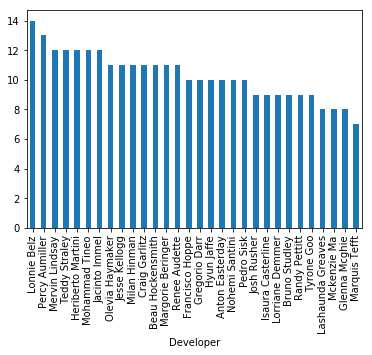

In [84]:
commits1_impl.sort_values(ascending = False).T.plot(kind = 'bar')

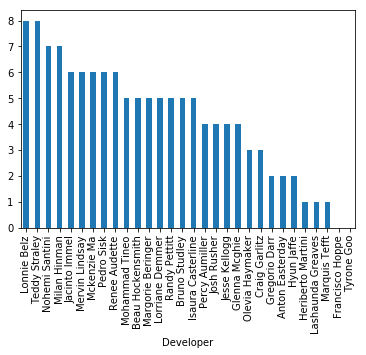

In [85]:
commits1_bugs.sort_values(ascending = False).T.plot(kind = 'bar')

In [86]:
commits1_all = commits1_impl + commits1_bugs
commits1_all.shape, commits1_impl.shape, commits1_bugs.shape

((30,), (30,), (30,))

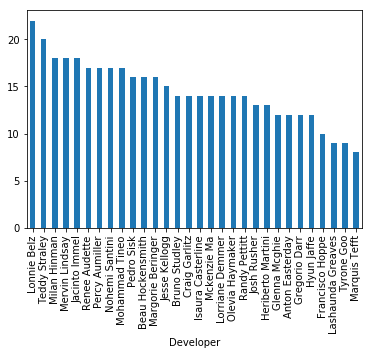

In [87]:
commits1_all.sort_values(ascending = False).T.plot(kind = 'bar')

<h1>Burnout analysis with 0-delay cost model</h1>

In [88]:
burnout1 = timecard.releaseBurnout(entries1_df)
burnout1

,Sprint,Stories Started,Stories Active,Implementing (# stories),Debugging (# stories),Stories Completed,Effort,Implementation Effort,Debugging Effort,Active Developers
0,1,73,73,73.0,0.0,45,300.0,300.0,0.0,30
1,2,66,66,66.0,0.0,30,300.0,300.0,0.0,30
2,3,63,79,71.0,8.0,43,300.0,291.8,8.2,30
3,4,53,96,67.0,29.0,53,300.0,273.6,26.4,30
4,5,41,95,64.0,31.0,59,300.0,273.0,27.0,30
5,6,13,57,38.0,19.0,38,234.4,218.6,15.8,30
6,7,0,20,8.0,12.0,16,41.6,29.0,12.6,15
7,8,0,14,0.0,14.0,13,18.4,0.0,18.4,10
8,9,0,8,0.0,8.0,7,11.0,0.0,11.0,8
9,10,0,4,0.0,4.0,4,7.6,0.0,7.6,5


In [18]:
burnout1_A = timecard.releaseBurnout(entries1_df[entries1_df['Team'] ==  'Team A'])
burnout1_A

,Sprint,Stories Started,Stories Active,Implementing (# stories),Debugging (# stories),Stories Completed,Effort,Implementation Effort,Debugging Effort,Active Developers
0,1,19,19,19.0,0.0,12,80.0,80.0,0.0,8
1,2,15,15,15.0,0.0,12,80.0,80.0,0.0,8
2,3,20,23,22.0,1.0,13,80.0,78.0,2.0,8
3,4,13,21,15.0,6.0,16,80.0,74.6,5.4,8
4,5,13,22,18.0,4.0,12,80.0,76.2,3.8,8
5,6,1,14,9.0,5.0,9,52.0,47.2,4.8,8
6,7,0,4,2.0,2.0,3,5.2,4.0,1.2,4
7,8,0,2,0.0,2.0,2,3.6,0.0,3.6,1
8,9,0,1,0.0,1.0,1,1.0,0.0,1.0,1
9,10,0,1,0.0,1.0,1,2.0,0.0,2.0,1


In [19]:
def team_r_trace(teamId, sprint, log=log1):
    r = log.mergeLogs('Resourcing')
    r2 = r[r['Sprint']==sprint][r['Developer'] != 'OWNER_TBD']
    r3 = r2[r2['Team Id'] == teamId]
    return r3
def team_o_trace(teamId, sprint, log=log1):
    o = log.mergeLogs('Outcome')
    o2 = o[o['Sprint']==sprint]
    o3 = o2[o2['Team Id'] == teamId]
    return o3

In [20]:
def r_trace(developer, log=log1):
    r = log.mergeLogs('Resourcing')
    #o = log.mergeLogs('Outcome')
    def F(sprint): 
        r2 = r[r['Sprint']==sprint][r['Developer'] != 'OWNER_TBD']
        return r2[r2['Developer']==developer] 
    return F

def o_trace(developer, log=log1):
    o = log.mergeLogs('Outcome')
    def F(sprint): 
        o2 = o[o['Sprint']==sprint]
        return o2[o2['Owner']==developer] 
    return F

In [21]:
team_r_trace('Team A', 8)

C:\Users\aleja\Documents\CodeImages\Technos\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Developer,Rejects (days),Rejects (#),Debugging (days),Debugging (#),Implementation (days),Implementation (#),Bandwidth,NEXT SPRINT (days),NEXT SPRINT (#),NEXT SPRINT Bandwidth,Team Id,Sprint
63,Anton Easterday,0.0,0,0.0,0,0.0,0,10.0,0.0,0,20.0,Team A,8
64,Beau Hockensmith,0.0,0,0.0,0,0.0,0,10.0,0.0,0,20.0,Team A,8
65,Bruno Studley,0.0,0,3.6,2,0.0,0,6.4,0.0,0,16.4,Team A,8
66,Craig Garlitz,0.0,0,0.0,0,0.0,0,10.0,0.0,0,20.0,Team A,8
67,Francisco Hoppe,0.0,0,0.0,0,0.0,0,10.0,0.0,0,20.0,Team A,8
68,Glenna Mcghie,0.0,0,0.0,0,0.0,0,10.0,0.0,0,20.0,Team A,8
69,Gregorio Darr,0.0,0,0.0,0,0.0,0,10.0,0.0,0,20.0,Team A,8
70,Heriberto Martini,0.0,0,0.0,0,0.0,0,10.0,0.0,0,20.0,Team A,8


In [22]:
team_o_trace('Team A', 8)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
118,Bruno Studley,DEV_TIME_BUGS,Ticket #100,UserStory #9,8.0,8.0,8,1.8,CURRENT_SPRINT,1.8,0.0,1.0,Team A,8
119,Bruno Studley,DEV_TIME_BUGS,Ticket #101,UserStory #21,8.0,8.0,8,1.8,CURRENT_SPRINT,1.8,0.0,1.0,Team A,8


In [23]:
team_o_trace('Team A', 9)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
120,Glenna Mcghie,DEV_TIME_BUGS,Ticket #114,UserStory #52,9.0,9.0,9,1.0,CURRENT_SPRINT,1.0,0.0,1.0,Team A,9


In [24]:
team_o_trace('Team A', 10)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
121,Beau Hockensmith,DEV_TIME_BUGS,Ticket #122,UserStory #2,10.0,10.0,10,2.0,CURRENT_SPRINT,2.0,0.0,1.0,Team A,10


In [25]:
br = r_trace('Bruno Studley')
bo = o_trace('Bruno Studley')

In [26]:
bo(6)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
104,Bruno Studley,DEV_TIME_BUGS,Ticket #70,UserStory #41,6.0,6.0,6,0.4,CURRENT_SPRINT,0.4,0.0,1.0,Team A,6
105,Bruno Studley,UNFINISHED_STORIES,Story implementation,UserStory #9,5.0,5.0,6,6.2,CURRENT_SPRINT,6.2,0.0,1.0,Team A,6


In [27]:
bo(7)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
116,Bruno Studley,DEV_TIME_BUGS,Ticket #88,UserStory #41,7.0,7.0,7,0.4,CURRENT_SPRINT,0.4,0.0,1.0,Team A,7


In [28]:
bo(8)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
118,Bruno Studley,DEV_TIME_BUGS,Ticket #100,UserStory #9,8.0,8.0,8,1.8,CURRENT_SPRINT,1.8,0.0,1.0,Team A,8
119,Bruno Studley,DEV_TIME_BUGS,Ticket #101,UserStory #21,8.0,8.0,8,1.8,CURRENT_SPRINT,1.8,0.0,1.0,Team A,8


In [29]:
bo(9)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint


In [30]:
bo(10)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint


<h1>Features vs Bugs</h1>

In [31]:
## TODO: CREATE a df that shows per developer # of days implementing user stories, # days fixing bugs. Developers
## with few bugs should be spending more time implementing user stories than developers with buggy code

In [32]:
o = log1.mergeLogs('Outcome')
o.shape

(513, 14)

In [33]:
o[-5:]

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
508,Randy Pettitt,DEV_TIME_BUGS,Ticket #113,UserStory #273,8.0,8.0,8,1.8,CURRENT_SPRINT,1.8,0.0,1.0,Team D,8
509,Teddy Straley,DEV_TIME_BUGS,Ticket #110,UserStory #242,8.0,8.0,8,1.6,CURRENT_SPRINT,1.6,0.0,1.0,Team D,8
510,Renee Audette,DEV_TIME_BUGS,Ticket #121,UserStory #252,9.0,9.0,9,1.4,CURRENT_SPRINT,1.4,0.0,1.0,Team D,9
511,Nohemi Santini,DEV_TIME_BUGS,Ticket #125,UserStory #259,10.0,10.0,10,2.0,CURRENT_SPRINT,2.0,0.0,1.0,Team D,10
512,Pedro Sisk,DEV_TIME_BUGS,Ticket #124,UserStory #240,10.0,10.0,10,2.0,CURRENT_SPRINT,2.0,0.0,1.0,Team D,10


In [34]:
oo = o.groupby(['Owner','Task Type'])

In [35]:
totals =oo['Effort Spent'].sum()
type(totals)

pandas.core.series.Series

In [36]:
totals

Owner              Task Type         
Anton Easterday    DEV_TIME_BUGS          1.2
                   UNFINISHED_STORIES    55.0
Beau Hockensmith   DEV_TIME_BUGS          5.8
                   UNFINISHED_STORIES    58.0
Bruno Studley      DEV_TIME_BUGS          5.6
                   UNFINISHED_STORIES    55.0
Craig Garlitz      DEV_TIME_BUGS          4.2
                   UNFINISHED_STORIES    58.0
Francisco Hoppe    UNFINISHED_STORIES    56.0
Glenna Mcghie      DEV_TIME_BUGS          4.4
                   UNFINISHED_STORIES    51.0
Gregorio Darr      DEV_TIME_BUGS          1.6
                   UNFINISHED_STORIES    53.0
Heriberto Martini  DEV_TIME_BUGS          1.0
                   UNFINISHED_STORIES    54.0
Hyun Jaffe         DEV_TIME_BUGS          3.0
                   UNFINISHED_STORIES    56.0
Isaura Casterline  DEV_TIME_BUGS          6.0
                   UNFINISHED_STORIES    56.0
Jacinto Immel      DEV_TIME_BUGS          5.2
                   UNFINISHED_STORIES    5

<h1>Meritocratic Model</h1>

In [37]:
tu_.DEV_DF[:3]

,Name,Developer Profile,Scrum Team,Bounded Context
0,Anton Easterday,Solid,A,Doctor
1,Beau Hockensmith,Mediocre,A,Doctor
2,Bruno Studley,New,A,Doctor


In [38]:
tu_.PM_DF[:3]

,PM,Bounded Context,Spec Quality (5 is best)
0,Edgar Hibbler,Patient,2
1,Sherlyn Cordle,Doctor,3
2,Spencer Venezia,Ministry of Health,1


In [39]:
# Sets the cost it takes to complete a task based on the profile of the developer completing it, as a percentage
# of the original estimate of the task:
class MeritocraticCostModel (CostModel):

    def __init__(self):
        return 
    
    # Sets deviation of real cost vs estimates depending on developer excellence
    # Star - 100%
    # Solid - 200%
    # Mediocre - 400%
    # QA: - 200%
    #
    # -item: a WorkItem instance
    def runModel(self, item, modelsConfig):   
        developer = modelsConfig.globalRepo.developersRepo.findDeveloper(item.owner)
        if developer.profile == S_.STAR:
            multiplier = 1.0
        else:
            if developer.profile == S_.SOLID:
                multiplier = 2.0
            else:
                if developer.profile == S_.MEDIOCRE:
                    multiplier = 4.0
                else:
                    multiplier = 3.0 # for new people and for everyone else
            
        return multiplier

In [40]:
modelsConfig2 = ModelsConfig([MeritocraticCostModel()], [DistributedLagQualityModel()], GreedyAllocationModel())
modelsConfig2.random.reset(271)

teams2_df, stories2_dfDUMMY, globalRepo2 = tu_.initTestData(tu_.DEV_DF, tu_.PM_DF, \
                                                    RELEASE_DURATION, SPRINT_DURATION, modelsConfig2)
modelsConfig2.globalRepo = globalRepo2

In [41]:
NUMBER_OF_SPRINTS2 = 30
entries2_df, log2 = timecard.runReleaseCycle(datetime(2018, 1, 15), SPRINT_DURATION, NUMBER_OF_SPRINTS2, modelsConfig2)
## Need to set stories2_df **after** release cycle since developer ownerships might be changed during the release
stories2_df = UserStory.build_stories_df(globalRepo2)
entries2_df.shape

(1814, 8)

In [42]:
modelsConfig3 = ModelsConfig([MeritocraticCostModel()], [DistributedLagQualityModel()], NoLaggardsyAllocationModel())
modelsConfig3.random.reset(271)

teams3_df, stories3_dfDUMMY, globalRepo3 = tu_.initTestData(tu_.DEV_DF, tu_.PM_DF, \
                                                    RELEASE_DURATION, SPRINT_DURATION, modelsConfig3)
modelsConfig3.globalRepo = globalRepo3

In [43]:
NUMBER_OF_SPRINTS3 = 30
entries3_df, log3 = timecard.runReleaseCycle(datetime(2018, 1, 15), SPRINT_DURATION, NUMBER_OF_SPRINTS3, modelsConfig3) 
## Need to set stories3_df **after** release cycle since developer ownerships might be changed during the release
stories3_df = UserStory.build_stories_df(globalRepo3)
entries3_df.shape

(1730, 8)

In [44]:
entries2_df[-3:]

,Sprint,Date,Team,Developer,User Story,Task Type,Task Description,Time Spent
1811,30,2019-03-11,Team B,None,None,None,None,0.0
1812,30,2019-03-11,Team C,None,None,None,None,0.0
1813,30,2019-03-11,Team D,None,None,None,None,0.0


In [45]:
burnout2 = timecard.releaseBurnout(entries2_df)
burnout2

,Sprint,Stories Started,Stories Active,Implementing (# stories),Debugging (# stories),Stories Completed,Effort,Implementation Effort,Debugging Effort,Active Developers
0,1,73,73,73.0,0.0,8,300.0,300.0,0.0,30
1,2,64,126,126.0,0.0,18,300.0,300.0,0.0,30
2,3,15,112,112.0,0.0,13,300.0,300.0,0.0,30
3,4,20,106,102.0,4.0,14,300.0,295.4,4.6,30
4,5,21,114,101.0,13.0,23,300.0,279.8,20.2,30
5,6,13,114,92.0,22.0,27,300.0,268.8,31.2,30
6,7,16,104,93.0,11.0,20,300.0,267.4,32.6,30
7,8,15,102,92.0,10.0,15,300.0,270.4,29.6,30
8,9,13,98,91.0,7.0,8,300.0,274.8,25.2,30
9,10,20,108,101.0,7.0,10,300.0,280.0,20.0,30


In [46]:
burnout3 = timecard.releaseBurnout(entries3_df)
burnout3

,Sprint,Stories Started,Stories Active,Implementing (# stories),Debugging (# stories),Stories Completed,Effort,Implementation Effort,Debugging Effort,Active Developers
0,1,77,77,77.0,0.0,11,300.000000,300.000000,0.0,30
1,2,59,124,124.0,0.0,19,300.000000,300.000000,0.0,30
2,3,14,105,105.0,0.0,6,300.000000,300.000000,0.0,30
3,4,20,106,103.0,3.0,19,300.000000,295.000000,5.0,30
4,5,22,110,98.0,12.0,21,300.000000,281.600000,18.4,30
5,6,9,110,90.0,20.0,30,300.000000,262.600000,37.4,30
6,7,19,104,94.0,10.0,19,300.000000,273.200000,26.8,30
7,8,19,106,99.0,7.0,19,300.000000,288.400000,11.6,30
8,9,11,95,90.0,5.0,10,300.000000,285.800000,14.2,30
9,10,18,103,99.0,4.0,15,300.000000,288.400000,11.6,30


In [47]:
burnout2['Implementation Effort'].sum(), burnout3['Implementation Effort'].sum()

(4743.0, 4640.233333333334)

In [48]:
bugs3 = globalRepo3.ticketsRepo.tickets
bugs3_df = Ticket.build_bugs_df(bugs3)
bugs3_df.shape

(147, 8)

In [49]:
xbugs3_df = bugs3_df
storiesRepo3 = modelsConfig3.globalRepo.storiesRepo
xbugs3_df['User Story Developer'] =  ''
xbugs3_df['User Story Developer'] = bugs3_df.apply(lambda row: storiesRepo3.findStory(row['User Story Id']).developer, axis=1)
xbugs3_df[:5]

,Ticket Id,User Story Id,Estimated Cost,Effort to Date,Percent Achieved,Sprint Reported,Sprint Fixed,Fixed By,User Story Developer
0,Ticket #1,UserStory #113,2.0,4.0,1.0,3,4,Jesse Kellogg,Jesse Kellogg
1,Ticket #2,UserStory #159,0.2,0.4,1.0,3,4,Mckenzie Ma,Mckenzie Ma
2,Ticket #3,UserStory #302,0.2,0.6,1.0,3,4,Teddy Straley,Teddy Straley
3,Ticket #4,UserStory #39,1.2,2.4,1.0,4,5,Anton Easterday,Anton Easterday
4,Ticket #5,UserStory #43,1.6,1.6,1.0,4,5,Francisco Hoppe,Francisco Hoppe


In [50]:
# Confirm that there was no work stealing: each developer fixed its own bugs. So the following should be empty
xbugs3_df[xbugs3_df['Fixed By'] != xbugs3_df['User Story Developer']]

,Ticket Id,User Story Id,Estimated Cost,Effort to Date,Percent Achieved,Sprint Reported,Sprint Fixed,Fixed By,User Story Developer


In [51]:
commits2_impl = stories2_df.groupby(['Developer'])['User Story Id'].count()
commits3_impl = stories3_df.groupby(['Developer'])['User Story Id'].count()

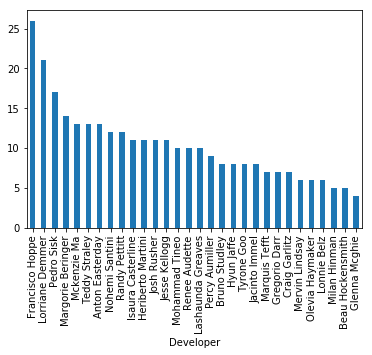

In [52]:
commits3_impl.sort_values(ascending = False).T.plot(kind = 'bar')

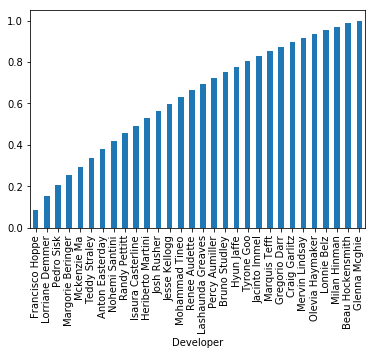

In [53]:
c3 = commits3_impl.sort_values(ascending = False)
acc3 = c3.cumsum()/c3.sum()
acc3.T.plot(kind = 'bar')

In [54]:
allAssignmentEvents3 = {}
for story in globalRepo3.storiesRepo.stories:
    uss = globalRepo3.teamsRepo.getUserStoryStatus(story.userStoryId)
    allAssignmentEvents3[story.userStoryId] = uss.assignmentEventsLog

allAssignmentEvents3    

{'UserStory #1': [[10, 'Gregorio Darr']],
 'UserStory #2': [[10, 'Beau Hockensmith'], [13, 'Heriberto Martini']],
 'UserStory #3': [[7, 'Francisco Hoppe']],
 'UserStory #4': [[8, 'Anton Easterday']],
 'UserStory #5': [[3, 'Craig Garlitz']],
 'UserStory #6': [[4, 'Francisco Hoppe']],
 'UserStory #7': [[5, 'Glenna Mcghie']],
 'UserStory #8': [[1, 'Craig Garlitz']],
 'UserStory #9': [[11, 'Anton Easterday']],
 'UserStory #10': [[7, 'Craig Garlitz']],
 'UserStory #11': [[2, 'Craig Garlitz']],
 'UserStory #12': [[4, 'Francisco Hoppe']],
 'UserStory #13': [[8, 'Francisco Hoppe']],
 'UserStory #14': [[1, 'Gregorio Darr']],
 'UserStory #15': [[1, 'Heriberto Martini']],
 'UserStory #16': [[2, 'Craig Garlitz']],
 'UserStory #17': [[1, 'Glenna Mcghie']],
 'UserStory #18': [[2, 'Anton Easterday']],
 'UserStory #19': [[1, 'Anton Easterday']],
 'UserStory #20': [[9, 'Heriberto Martini']],
 'UserStory #21': [[8, 'Francisco Hoppe']],
 'UserStory #22': [[1, 'Gregorio Darr']],
 'UserStory #23': [[1, 'Br

In [55]:
workStolen3 = {}
for story in globalRepo3.storiesRepo.stories:
    uss = globalRepo3.teamsRepo.getUserStoryStatus(story.userStoryId)
    if len(uss.assignmentEventsLog) > 1:
        workStolen3[story.userStoryId] = uss.assignmentEventsLog

workStolen3

{'UserStory #2': [[10, 'Beau Hockensmith'], [13, 'Heriberto Martini']],
 'UserStory #48': [[4, 'Anton Easterday'], [7, 'Francisco Hoppe']],
 'UserStory #62': [[2, 'Beau Hockensmith'], [5, 'Francisco Hoppe']],
 'UserStory #63': [[7, 'Gregorio Darr'], [14, 'Francisco Hoppe']],
 'UserStory #66': [[2, 'Beau Hockensmith'], [13, 'Francisco Hoppe']],
 'UserStory #71': [[1, 'Craig Garlitz'], [4, 'Francisco Hoppe']],
 'UserStory #76': [[3, 'Glenna Mcghie'], [13, 'Francisco Hoppe']],
 'UserStory #79': [[2, 'Glenna Mcghie'],
  [13, 'Heriberto Martini'],
  [14, 'Beau Hockensmith']],
 'UserStory #122': [[14, 'Lashaunda Greaves'], [18, 'Josh Rusher']],
 'UserStory #134': [[14, 'Hyun Jaffe'], [18, 'Isaura Casterline']],
 'UserStory #135': [[2, 'Lashaunda Greaves'],
  [18, 'Isaura Casterline'],
  [19, 'Jesse Kellogg']],
 'UserStory #137': [[1, 'Lashaunda Greaves'], [18, 'Josh Rusher']],
 'UserStory #186': [[2, 'Marquis Tefft'], [8, 'Lorriane Demmer']],
 'UserStory #199': [[6, 'Mervin Lindsay'], [14, '

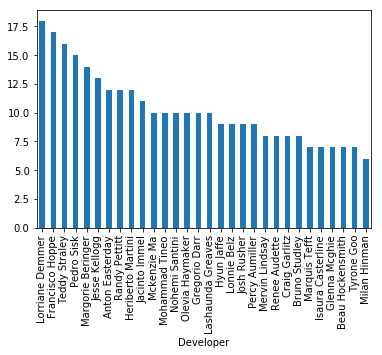

In [56]:
commits2_impl.sort_values(ascending = False).T.plot(kind = 'bar')

In [57]:
workStolen2 = {}
for story in globalRepo2.storiesRepo.stories:
    uss = globalRepo2.teamsRepo.getUserStoryStatus(story.userStoryId)
    if len(uss.assignmentEventsLog) > 1:
        workStolen2[story.userStoryId] = uss.assignmentEventsLog

workStolen2

{}

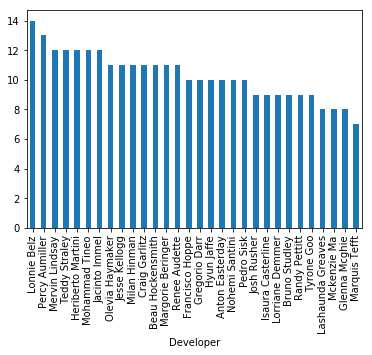

In [58]:
commits1_impl.sort_values(ascending = False).T.plot(kind = 'bar')

In [59]:
allAssignmentEvents1 = {}
for story in globalRepo1.storiesRepo.stories:
    uss = globalRepo1.teamsRepo.getUserStoryStatus(story.userStoryId)
    allAssignmentEvents1[story.userStoryId] = uss.assignmentEventsLog

allAssignmentEvents1 

{'UserStory #1': [[2, 'Bruno Studley']],
 'UserStory #2': [[5, 'Beau Hockensmith']],
 'UserStory #3': [[5, 'Beau Hockensmith']],
 'UserStory #4': [[3, 'Craig Garlitz']],
 'UserStory #5': [[3, 'Gregorio Darr']],
 'UserStory #6': [[3, 'Glenna Mcghie']],
 'UserStory #7': [[5, 'Glenna Mcghie']],
 'UserStory #8': [[1, 'Francisco Hoppe']],
 'UserStory #9': [[5, 'Bruno Studley']],
 'UserStory #10': [[4, 'Anton Easterday']],
 'UserStory #11': [[5, 'Heriberto Martini']],
 'UserStory #12': [[4, 'Beau Hockensmith']],
 'UserStory #13': [[3, 'Heriberto Martini']],
 'UserStory #14': [[1, 'Bruno Studley']],
 'UserStory #15': [[1, 'Beau Hockensmith']],
 'UserStory #16': [[2, 'Heriberto Martini']],
 'UserStory #17': [[1, 'Glenna Mcghie']],
 'UserStory #18': [[2, 'Francisco Hoppe']],
 'UserStory #19': [[1, 'Gregorio Darr']],
 'UserStory #20': [[3, 'Bruno Studley']],
 'UserStory #21': [[4, 'Bruno Studley']],
 'UserStory #22': [[1, 'Bruno Studley']],
 'UserStory #23': [[1, 'Anton Easterday']],
 'UserStory

In [60]:
fo = o_trace('Francisco Hoppe', log3)
fr = r_trace('Francisco Hoppe', log3)
po = o_trace('Percy Aumiller', log3)
pr = r_trace('Percy Aumiller', log3)
pso = o_trace('Pedro Sisk', log3)

In [61]:
entries3A = entries3_df[entries3_df['Team'] == 'Team A']
burnout3A = timecard.releaseBurnout(entries3A)
burnout3A

,Sprint,Stories Started,Stories Active,Implementing (# stories),Debugging (# stories),Stories Completed,Effort,Implementation Effort,Debugging Effort,Active Developers
0,1,19,19,19.0,0.0,3,80.000000,80.000000,0.0,8
1,2,16,32,32.0,0.0,6,80.000000,80.000000,0.0,8
2,3,5,26,26.0,0.0,3,80.000000,80.000000,0.0,8
3,4,6,24,24.0,0.0,7,80.000000,80.000000,0.0,8
4,5,9,26,23.0,3.0,5,80.000000,75.600000,4.4,8
5,6,1,29,19.0,10.0,13,80.000000,62.600000,17.4,8
6,7,8,25,24.0,1.0,6,80.000000,72.000000,8.0,8
7,8,5,25,24.0,1.0,5,80.000000,78.200000,1.8,8
8,9,4,22,21.0,1.0,2,80.000000,78.400000,1.6,8
9,10,6,26,25.0,1.0,5,80.000000,78.000000,2.0,8


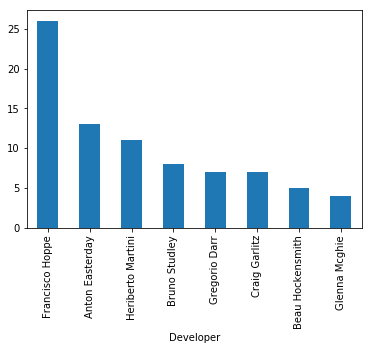

In [62]:
stories3A = stories3_df[stories3_df['Team Id'] == 'Team A']
commits3A_impl = stories3A.groupby(['Developer'])['User Story Id'].count()
commits3A_impl.sort_values(ascending = False).T.plot(kind = 'bar')

In [63]:
workStolen3A = {}
for storyId in stories3A['User Story Id']:
    uss = globalRepo3.teamsRepo.getUserStoryStatus(storyId)
    if len(uss.assignmentEventsLog) > 1:
        workStolen3A[storyId] = uss.assignmentEventsLog

workStolen3A

{'UserStory #2': [[10, 'Beau Hockensmith'], [13, 'Heriberto Martini']],
 'UserStory #48': [[4, 'Anton Easterday'], [7, 'Francisco Hoppe']],
 'UserStory #62': [[2, 'Beau Hockensmith'], [5, 'Francisco Hoppe']],
 'UserStory #63': [[7, 'Gregorio Darr'], [14, 'Francisco Hoppe']],
 'UserStory #66': [[2, 'Beau Hockensmith'], [13, 'Francisco Hoppe']],
 'UserStory #71': [[1, 'Craig Garlitz'], [4, 'Francisco Hoppe']],
 'UserStory #76': [[3, 'Glenna Mcghie'], [13, 'Francisco Hoppe']],
 'UserStory #79': [[2, 'Glenna Mcghie'],
  [13, 'Heriberto Martini'],
  [14, 'Beau Hockensmith']]}

In [65]:
def utilizationA(sprint):
    df = entries3A[entries3A['Sprint'] == sprint]
    return df.groupby('Developer')['Time Spent'].sum()
def outA(developer, sprint):
    df = team_o_trace('Team A', sprint, log3)
    df1 = df[df['Owner']==developer]
    return df1

In [66]:
utilizationA(12)

Developer
Anton Easterday      10.0
Beau Hockensmith     10.0
Bruno Studley        10.0
Craig Garlitz        10.0
Francisco Hoppe       9.8
Glenna Mcghie        10.0
Gregorio Darr        10.0
Heriberto Martini     2.4
Name: Time Spent, dtype: float64

In [ ]:
outA('Craig Garlitz', 5)

In [67]:
utilizationA(13)

Developer
Anton Easterday      10.0
Beau Hockensmith      6.0
Bruno Studley        10.0
Craig Garlitz        10.0
Francisco Hoppe       8.0
Glenna Mcghie        10.0
Gregorio Darr        10.0
Heriberto Martini    10.0
Name: Time Spent, dtype: float64

In [68]:
utilizationA(14)

Developer
Anton Easterday       3.600000
Beau Hockensmith      8.000000
Bruno Studley         2.000000
Craig Garlitz        10.000000
Francisco Hoppe       8.466667
Glenna Mcghie         6.400000
Gregorio Darr         4.800000
Heriberto Martini     3.200000
Name: Time Spent, dtype: float64

In [69]:
team_o_trace('Team A', 14, log3)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
311,Anton Easterday,UNFINISHED_STORIES,Story implementation,UserStory #9,11.0,11.0,14,0.400000,CURRENT_SPRINT,0.800000,0.000000,1.000,Team A,14
312,Anton Easterday,UNFINISHED_STORIES,Story implementation,UserStory #74,5.0,5.0,14,1.400000,CURRENT_SPRINT,2.800000,0.000000,1.000,Team A,14
313,Beau Hockensmith,UNFINISHED_STORIES,Story implementation,UserStory #79,2.0,14.0,14,2.000000,CURRENT_SPRINT,8.000000,0.000000,1.000,Team A,14
314,Bruno Studley,UNFINISHED_STORIES,Story implementation,UserStory #78,5.0,5.0,14,0.666667,CURRENT_SPRINT,2.000000,0.000000,1.000,Team A,14
315,Craig Garlitz,DEV_TIME_BUGS,Ticket #86,UserStory #34,14.0,14.0,14,1.800000,CURRENT_SPRINT,5.400000,0.000000,1.000,Team A,14
316,Craig Garlitz,UNFINISHED_STORIES,Story implementation,UserStory #80,10.0,10.0,NOT_SET,2.666667,CURRENT_SPRINT,4.600000,1.133333,0.575,Team A,14
317,Francisco Hoppe,DEV_TIME_BUGS,Ticket #87,UserStory #51,14.0,14.0,14,1.600000,CURRENT_SPRINT,1.600000,0.000000,1.000,Team A,14
318,Francisco Hoppe,DEV_TIME_BUGS,Ticket #88,UserStory #55,14.0,14.0,14,2.000000,CURRENT_SPRINT,2.000000,0.000000,1.000,Team A,14
319,Francisco Hoppe,UNFINISHED_STORIES,Story implementation,UserStory #63,7.0,14.0,14,4.866667,CURRENT_SPRINT,4.866667,0.000000,1.000,Team A,14
320,Glenna Mcghie,DEV_TIME_BUGS,Ticket #84,UserStory #7,14.0,14.0,14,1.600000,CURRENT_SPRINT,6.400000,0.000000,1.000,Team A,14


In [70]:
team_o_trace('Team A', 15, log3)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
323,Craig Garlitz,UNFINISHED_STORIES,Story implementation,UserStory #80,10.0,10.0,15,1.133333,CURRENT_SPRINT,3.4,0.0,1.0,Team A,15


In [71]:
team_o_trace('Team A', 16, log3)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
324,Beau Hockensmith,DEV_TIME_BUGS,Ticket #96,UserStory #29,16.0,16.0,16,1.6,CURRENT_SPRINT,6.4,0.0,1.0,Team A,16
325,Bruno Studley,DEV_TIME_BUGS,Ticket #95,UserStory #27,16.0,16.0,16,1.4,CURRENT_SPRINT,4.2,0.0,1.0,Team A,16


In [72]:
team_o_trace('Team A', 17, log3)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint
326,Beau Hockensmith,DEV_TIME_BUGS,Ticket #107,UserStory #79,17.0,17.0,17,0.4,CURRENT_SPRINT,1.6,0.0,1.0,Team A,17
327,Francisco Hoppe,DEV_TIME_BUGS,Ticket #106,UserStory #63,17.0,17.0,17,1.8,CURRENT_SPRINT,1.8,0.0,1.0,Team A,17
328,Glenna Mcghie,DEV_TIME_BUGS,Ticket #105,UserStory #25,17.0,17.0,17,1.6,CURRENT_SPRINT,6.4,0.0,1.0,Team A,17
329,Gregorio Darr,DEV_TIME_BUGS,Ticket #104,UserStory #1,17.0,17.0,17,2.0,CURRENT_SPRINT,6.0,0.0,1.0,Team A,17


In [73]:
team_o_trace('Team A', 18, log3)

,Owner,Task Type,Task Description,User Story Id,Planned for Sprint,Most Recently Assigned in Sprint,Delivered in Sprint,Original Estimate,Bucket,Effort Spent,Effort Remaining,Percent Achieved,Team Id,Sprint


In [ ]:
def brfr(sprint):
    df = team_o_trace('Team A', sprint, log3)
    df1 = df[df['Owner']=='Bruno Studley']
    df2 = df[df['Owner']=='Francisco Hoppe']
    return pd.concat([df1, df2])

def brea(sprint):
    df = team_o_trace('Team A', sprint, log3)
    df1 = df[df['Owner']=='Bruno Studley']
    df2 = df[df['Owner']=='Anton Easterday']
    return pd.concat([df1, df2])

def cggm(sprint):
    df = team_o_trace('Team A', sprint, log3)
    df1 = df[df['Owner']=='Craig Garlitz']
    df2 = df[df['Owner']=='Glenna Mcghie']
    return pd.concat([df1, df2])
              
brea(3)

In [ ]:
brea(4)

In [ ]:
cggm(13)

In [ ]:
cggm(14)

In [ ]:
cggm(15)

In [ ]:
brfr(15)

In [ ]:
brfr(16)

In [ ]:
po(21)

In [ ]:
pso(21)

In [ ]:
pss = stories3_df[stories3_df['Developer'] == 'Pedro Sisk']
pss

In [ ]:
fhs = stories3_df[stories3_df['Developer'] == 'Francisco Hoppe']
fhs

In [ ]:
fhs['Original Estimate'].sum(), pss['Original Estimate'].sum()

In [ ]:
entries3_df[entries3_df['Developer'] == 'Francisco Hoppe'][-2:]

In [ ]:
entries3_df[entries3_df['Developer'] == 'Pedro Sisk'][-2:]

In [ ]:
fo(1)

In [ ]:
po(1)

In [ ]:
po(2)

In [ ]:
x= po(3)
x

In [ ]:
laggards = set(x[x['Planned for Sprint'] +2 <= 3]['Owner'])
laggards

In [ ]:
po(4)

In [ ]:
po(5)

In [ ]:
po(6)

In [ ]:
po(7)

In [ ]:
po(8)

In [ ]:
po(9)

In [ ]:
po(10)

In [ ]:
po(11)

In [ ]:
po(12)

In [ ]:
x = po(13)
x

In [ ]:
laggards = set(x[x['Planned for Sprint'] +2 <= 13]['Owner'])
laggards

In [ ]:
fo(2)

In [ ]:
fo(10)

In [ ]:
po(10)

In [ ]:
fo(11)

In [ ]:
po(11)

In [ ]:
fo(12)

In [ ]:
po(12)

In [ ]:
fo(13)

In [ ]:
po(13)

In [ ]:
fo(14)

In [ ]:
po(14)

In [ ]:
fo(15)

In [ ]:
po(15)

In [ ]:
fo(16)

In [ ]:
po(19)